Index(['Asx Code', 'Company Name', 'Finacial Year', 'Revenue Increase %',
       'industry', 'pricediff'],
      dtype='object')
all shares is 507


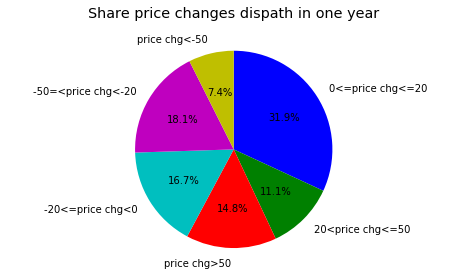

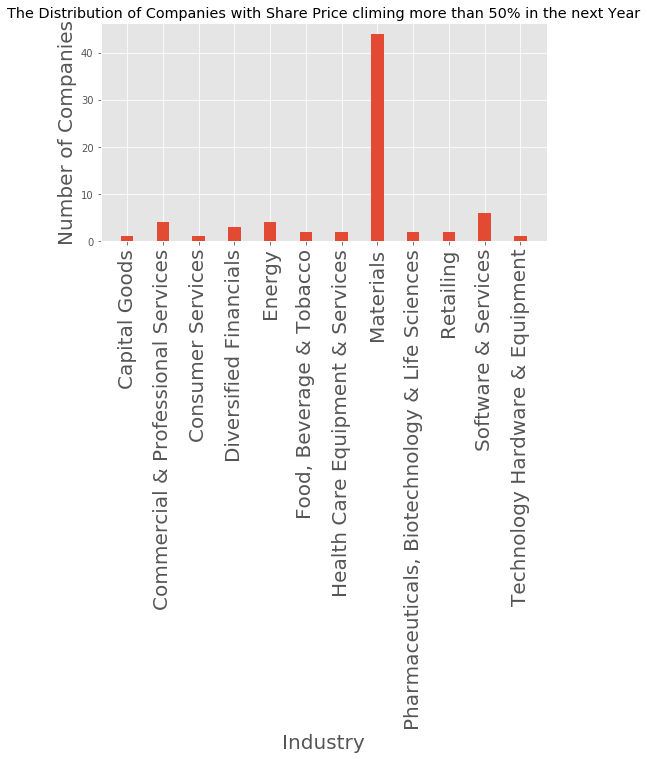

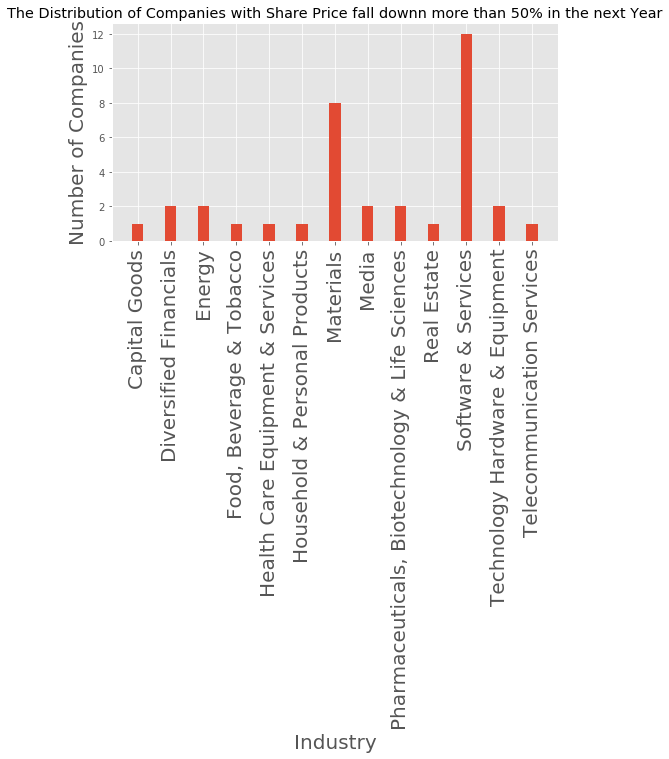

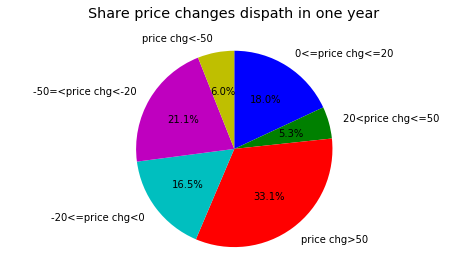

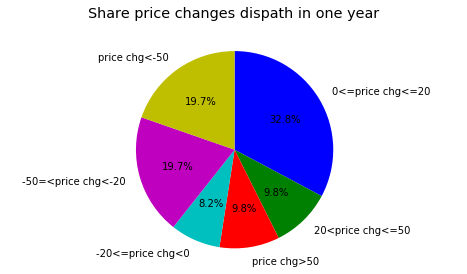

In [7]:
# draw with matplotlib to show the meanings of data
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np

def DrawBar(df,title_msg):
    plt.figure(figsize=(8,4))
    label = df['industry']
    cmpcount = df['Company Count']
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, cmpcount,0.35)
    plt.xlabel('Industry', fontsize=20)
    plt.ylabel('Number of Companies', fontsize=20)
    plt.xticks(index, label, fontsize=20, rotation=90)
    plt.title(title_msg)
    plt.show()
    
    
def DrawPie(slice_list,labels,colors):
    plt.style.use('ggplot')
    plt.figure(figsize=(8,4))
    #explode = (0,0.05,0.08,0.10,0,0,0)
    plt.pie(slice_list,
        #explode=explode,
        labels=labels,colors=colors,
        labeldistance = 1.15,autopct = '%3.1f%%',shadow = False,
        startangle = 90,pctdistance = 0.6,counterclock = False)
    plt.axis('equal')
    plt.title('Share price changes dispath in one year',y = 1.08)
    plt.show()

    
    

dataFile = './shares_likely_jump_cashburn_filter.csv'
df =pd.read_csv(dataFile,header=0,index_col=0)
df.rename(columns={"Asx Code.1": "Asx Code"},inplace=True)
print(df.columns)

df.groupby('industry').agg({'Company Name':'count'}).rename(columns={'Company Name':'Company Count'})

print('all shares is',df.shape[0])



"""
We are going to draw pie chart to indicate different price changes distribution 
"""
df0_20 = df[(df['pricediff']>=0) & (df['pricediff']<=20)]
df20_50 = df[(df['pricediff']>20) & (df['pricediff']<=50)]
df50 = df[df['pricediff']>50]

df0_neg20 = df[(df['pricediff']>=-20) & (df['pricediff']<0)]
df_neg20_neg50 = df[(df['pricediff']>=-50) & (df['pricediff']<-20)]
df_neg50 = df[df['pricediff']<-50]


price_chg = [df0_20.shape[0],df20_50.shape[0],df50.shape[0],df0_neg20.shape[0],df_neg20_neg50.shape[0],df_neg50.shape[0]]
labels = ['0<=price chg<=20','20<price chg<=50','price chg>50','-20<=price chg<0','-50=<price chg<-20','price chg<-50']
colors=('b', 'g', 'r', 'c', 'm', 'y')
DrawPie(price_chg,labels,colors)


"""
We are going to draw bar chart to indicate number of companies with outstanding price changes in the industries.
"""
df50_group = df50.groupby('industry').agg({'Company Name':'count'}).rename(columns={'Company Name':'Company Count'}).reset_index()
DrawBar(df50_group,'The Distribution of Companies with Share Price climing more than 50% in the next Year')


dfneg50_group = df_neg50.groupby('industry').agg({'Company Name':'count'}).rename(columns={'Company Name':'Company Count'}).reset_index()
DrawBar(dfneg50_group,'The Distribution of Companies with Share Price fall downn more than 50% in the next Year')


"""
we can see from above analysis that 'Materials' and 'Software & Services' are quite outstanding, I need to 
pick them up  to do special analysis.
"""
df_total_materials = df[df['industry']=='Materials']
df_total_software_services = df[df['industry']=='Software & Services']

df0_20_Materials = df0_20[df0_20['industry']=='Materials']
df20_50_Materials = df20_50[df20_50['industry']=='Materials']
df50_Materials = df50[df50['industry']=='Materials']

df0_neg20_Materials = df0_neg20[df0_neg20['industry']=='Materials']
df_neg20_neg50_Materials = df_neg20_neg50[df_neg20_neg50['industry']=='Materials']
df_neg50_Materials = df_neg50[df_neg50['industry']=='Materials']

materials_price_chg = [df0_20_Materials.shape[0],df20_50_Materials.shape[0],df50_Materials.shape[0],
                       df0_neg20_Materials.shape[0],df_neg20_neg50_Materials.shape[0],df_neg50_Materials.shape[0]]
labels = ['0<=price chg<=20','20<price chg<=50','price chg>50','-20<=price chg<0','-50=<price chg<-20','price chg<-50']
colors=('b', 'g', 'r', 'c', 'm', 'y')
DrawPie(materials_price_chg,labels,colors)



df0_20_Materials = df0_20[df0_20['industry']=='Software & Services']
df20_50_Materials = df20_50[df20_50['industry']=='Software & Services']
df50_Materials = df50[df50['industry']=='Software & Services']

df0_neg20_Materials = df0_neg20[df0_neg20['industry']=='Software & Services']
df_neg20_neg50_Materials = df_neg20_neg50[df_neg20_neg50['industry']=='Software & Services']
df_neg50_Materials = df_neg50[df_neg50['industry']=='Software & Services']

materials_price_chg = [df0_20_Materials.shape[0],df20_50_Materials.shape[0],df50_Materials.shape[0],
                       df0_neg20_Materials.shape[0],df_neg20_neg50_Materials.shape[0],df_neg50_Materials.shape[0]]
labels = ['0<=price chg<=20','20<price chg<=50','price chg>50','-20<=price chg<0','-50=<price chg<-20','price chg<-50']
colors=('b', 'g', 'r', 'c', 'm', 'y')
DrawPie(materials_price_chg,labels,colors)


